In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('~/data/1_Single_Cell_PRS/2_cV2F/benchmarking.tsv', sep='\t')

In [15]:
tissue_trait_dict = {'INI30120' : 'Lymphocyte Count', 'INI50030700': 'eGFR', 'INI1003063': 'FEV1/FVC Ratio', 'INI20030780 (exclude APOE)': 'LDL-C (excl. APOE)'}

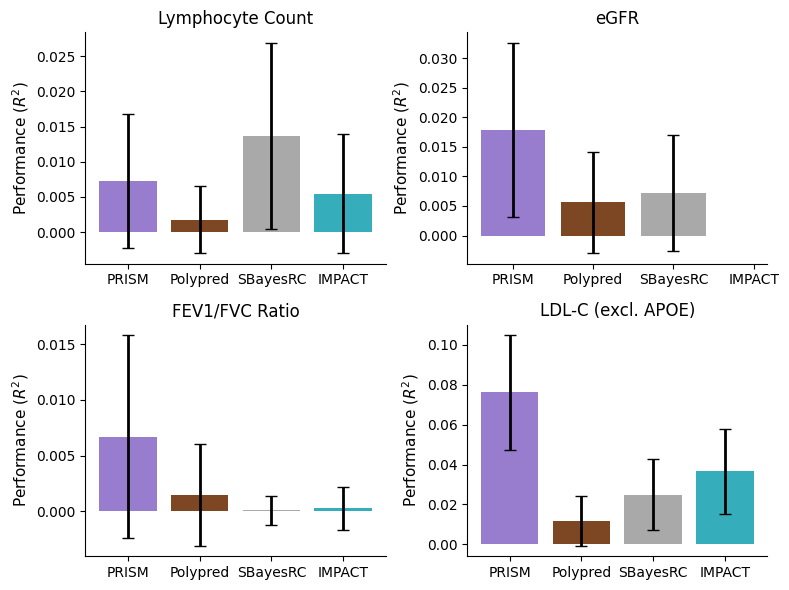

In [17]:
# === Plotting settings ===
order = ["PRISM", "Polypred", "SBayesRC", "IMPACT"]
colors = ["#9370DB", "#8B4513", "#A9A9A9", "#1fbfd0"]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

# === Generate subplots ===
for i, (code, trait) in enumerate(tissue_trait_dict.items()):
    ax = axes[i]
    df_trait = df[df["Phenotype"] == code].copy()

    # Compute error bars
    df_trait["err_lower"] = df_trait["eval"] - df_trait["l_eval"]
    df_trait["err_upper"] = df_trait["u_eval"] - df_trait["eval"]

    # Barplot
    sns.barplot(
        data=df_trait,
        x="Method", y="eval",
        order=order, palette=colors, ax=ax,
        capsize=0, edgecolor=None
    )

    # Add error bars
    ax.errorbar(
        x=range(len(order)),
        y=df_trait.set_index("Method").loc[order, "eval"],
        yerr=[
            df_trait.set_index("Method").loc[order, "err_lower"],
            df_trait.set_index("Method").loc[order, "err_upper"]
        ],
        fmt='none', ecolor='black', elinewidth=2, capsize=4
    )

    ax.set_title(trait, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Performance ($R^2$)", fontsize=11)
    sns.despine(ax=ax)

# Remove any extra axes (if fewer than 4 phenotypes)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [18]:
tissue_trait_dict = {'INI30120' : 'Lymphocyte Count', 'INI50030700': 'eGFR', 'INI1003063': 'FEV1/FVC Ratio', 'INI20030780': 'LDL-C'}

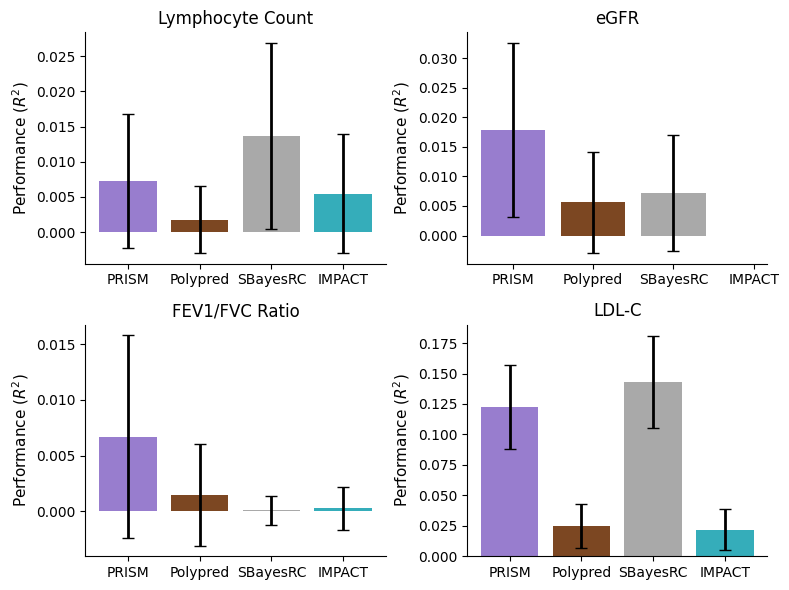

In [19]:
# === Plotting settings ===
order = ["PRISM", "Polypred", "SBayesRC", "IMPACT"]
colors = ["#9370DB", "#8B4513", "#A9A9A9", "#1fbfd0"]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

# === Generate subplots ===
for i, (code, trait) in enumerate(tissue_trait_dict.items()):
    ax = axes[i]
    df_trait = df[df["Phenotype"] == code].copy()

    # Compute error bars
    df_trait["err_lower"] = df_trait["eval"] - df_trait["l_eval"]
    df_trait["err_upper"] = df_trait["u_eval"] - df_trait["eval"]

    # Barplot
    sns.barplot(
        data=df_trait,
        x="Method", y="eval",
        order=order, palette=colors, ax=ax,
        capsize=0, edgecolor=None
    )

    # Add error bars
    ax.errorbar(
        x=range(len(order)),
        y=df_trait.set_index("Method").loc[order, "eval"],
        yerr=[
            df_trait.set_index("Method").loc[order, "err_lower"],
            df_trait.set_index("Method").loc[order, "err_upper"]
        ],
        fmt='none', ecolor='black', elinewidth=2, capsize=4
    )

    ax.set_title(trait, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Performance ($R^2$)", fontsize=11)
    sns.despine(ax=ax)

# Remove any extra axes (if fewer than 4 phenotypes)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
